In [37]:
#Naives Bayes Classification
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

import warnings as wn
wn.filterwarnings('ignore')

In [38]:
df=pd.read_csv('/content/sample_data/Sample_Data.csv')
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            2000 non-null   int64 
 1   workclass      2000 non-null   object
 2   education      2000 non-null   object
 3   educationno    2000 non-null   int64 
 4   maritalstatus  2000 non-null   object
 5   occupation     2000 non-null   object
 6   relationship   2000 non-null   object
 7   race           2000 non-null   object
 8   sex            2000 non-null   object
 9   capitalgain    2000 non-null   int64 
 10  capitalloss    2000 non-null   int64 
 11  hoursperweek   2000 non-null   int64 
 12  native         2000 non-null   object
 13  Salary         2000 non-null   object
dtypes: int64(5), object(9)
memory usage: 218.9+ KB


In [40]:
df.shape

(2000, 14)

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [41]:
for i in df.columns:
  if df[i].dtype==object:
    df[i]=le.fit_transform(df[i])
  else:
    pass

In [42]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,34,0
1,50,4,9,13,2,3,0,4,1,0,0,13,34,0
2,38,2,11,9,0,5,1,4,1,0,0,40,34,0
3,53,2,1,7,2,5,0,2,1,0,0,40,34,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2000.0,38.6955,12.879547,17.0,28.75,38.0,47.0,90.0
workclass,2000.0,2.2000,0.943104,0.0,2.00,2.0,2.0,6.0
education,2000.0,10.3430,3.742640,0.0,9.00,11.0,12.0,15.0
educationno,2000.0,10.1685,2.484793,1.0,9.00,10.0,13.0,16.0
maritalstatus,2000.0,2.5745,1.494847,0.0,2.00,2.0,4.0,6.0
occupation,2000.0,6.1000,4.041060,0.0,3.00,6.0,9.0,13.0
relationship,2000.0,1.4225,1.623056,0.0,0.00,1.0,3.0,5.0
race,2000.0,3.6705,0.825391,0.0,4.00,4.0,4.0,4.0
sex,2000.0,0.6865,0.464032,0.0,0.00,1.0,1.0,1.0
capitalgain,2000.0,1092.9855,7448.868171,0.0,0.00,0.0,0.0,99999.0


In [47]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [49]:
#Finding Correlation
corr=df.corr()

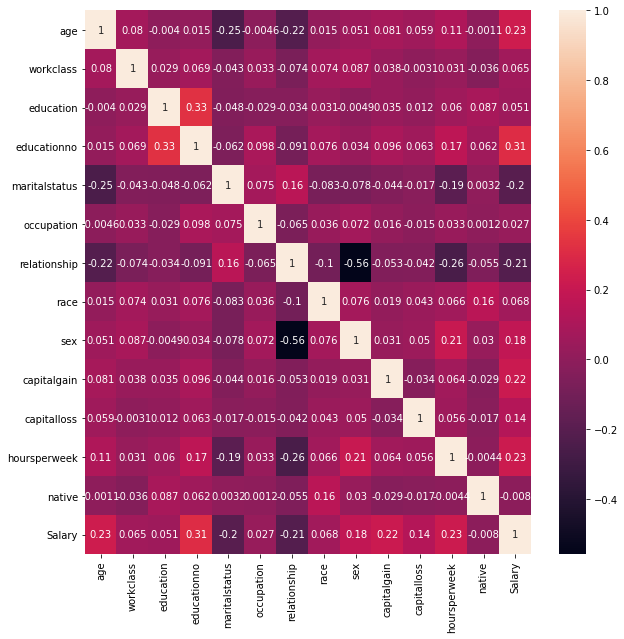

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

Majority of the student has education of 8-11 years

Skew: -0.26091038063465394
Kurtosis: 0.5609679465660338


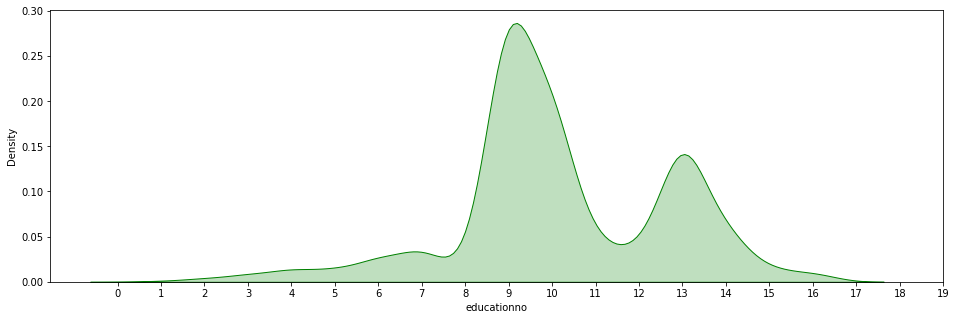

In [55]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['educationno'].skew()))
print("Kurtosis: {}".format(df['educationno'].kurtosis()))
ax = sns.kdeplot(df['educationno'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

In [58]:
X=df.iloc[:,0:13]
Y=df.iloc[:,-1]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [60]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1400, 13), (1400,), (600, 13), (600,))

In [77]:
# Preparing a naive bayes model
from sklearn.naive_bayes import GaussianNB as GB

# Gaussian Naive Bayes
classifier_gb = GB()
classifier_gb.fit(X_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [79]:
train_pred_g = classifier_gb.predict(X_train)
accuracy_train_g = np.mean(train_pred_g==y_train)

In [63]:
accuracy_train_g

0.7728571428571429

In [80]:

test_pred_g = classifier_gb.predict(X_test)
accuracy_test_g = np.mean(test_pred_g==y_test)

In [65]:
accuracy_test_g

0.8183333333333334

In [66]:
confusion_matrix(y_test, test_pred_g)

array([[438,  20],
       [ 89,  53]])

In [72]:
pd.crosstab(y_test.values,classifier_gb)

col_0,"GaussianNB(priors=None, var_smoothing=1e-09)"
row_0,
0,458
1,142


In [75]:
print ("Accuracy",np.mean(test_pred_g==y_test)*100)

Accuracy 81.83333333333334


In [76]:
#with Gaussian Naives Bayes Model , Accuracy is 81.83%

In [78]:
# Preparing a naive bayes model
from sklearn.naive_bayes import MultinomialNB as MB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [81]:
train_pred_m = classifier_mb.predict(X_train)
accuracy_train_m = np.mean(train_pred_m==y_train)

In [82]:
accuracy_train_m

0.7542857142857143

In [83]:
test_pred_m = classifier_mb.predict(X_test)
accuracy_test_m = np.mean(test_pred_m==y_test)

In [84]:
accuracy_test_m

0.7966666666666666

In [85]:
confusion_matrix(y_test, test_pred_m)

array([[444,  14],
       [108,  34]])

In [86]:
pd.crosstab(y_test.values,classifier_mb)

col_0,"MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)"
row_0,
0,458
1,142


In [87]:
print ("Accuracy",np.mean(test_pred_m==y_test)*100)

Accuracy 79.66666666666666


In [88]:
#with Multinomial Naives Bayes Model , Accuracy is 79.67%